# <span style='color:deepskyblue'> Cosmology MCMC notebook </span>

## <span style='color:deepskyblue'>Preliminaries</span>

In [21]:
# Install required packages (if not available on server)
#!pip install getdist
import numpy as np
import matplotlib.pyplot as plt

## <span style='color:deepskyblue'> The $\Lambda$CDM Model </span>

The Lambda-Cold-Dark-Matter ($\Lambda$CDM) Model is our concordance cosmological model. It postulates a Universe that behaves according to **General Relativity**, filled with **baryons** (protons, neutrons - the stuff we and stars are made of!), **Cold Dark Matter (CDM)** and a **Cosmological Constant** $\Lambda$.

The expansion of the Universe is best described in terms of the **scale factor** $a$ (the "radius" of the Universe, conventionally set to 1 today) and the **Hubble rate** $H$

$$
H \equiv \frac{\dot a}{a}
$$

The Einstein Equations in a **homogeneous, isotropic** Universe have an especially simple form and a special name, **Friedmann Equation**:

$$
H^2 = \frac{8\pi G}{3}\rho + \frac{k}{a^2}
$$

where $\rho$ is the total energy density of the Universe (at a certain time or size), and $k$ is a universal constant related to the [spatial curvature and shape of the Universe](https://en.wikipedia.org/wiki/Shape_of_the_universe#:~:text=The%20spatial%20curvature%20is%20related,indistinguishable%20spaces%20with%20different%20topologies.). In the $\Lambda$CDM model, this additionally simplifies to

$$
\boxed{
H^2 = H_0^2\left(\Omega_\Lambda + \Omega_m a^{-3} + \Omega_k a^{-2}\right)
}
\qquad
\qquad
\Omega_m + \Omega_\Lambda + \Omega_k = 1
$$

$H_0$ is the value of the Hubble rate *today*, and the parameters $\Omega_m$, $\Omega_\Lambda$ and $\Omega_k$ are dimensionless quantities indicating how much of the present expansion of the Universe is due to (non-relativistic) matter, cosmological constant $\Lambda$, and spatial curvature $k$. Note that the three $\Omega$'s are *not independent* (their sum is 1) and that we grouped together the contribution of baryons and CDM,

$$
\Omega_m = \Omega_{\rm CDM} + \Omega_{\rm b}
$$

and that we have evidence that independent evidence that $\Omega_b \approx 5$\%. Note that only $\Omega_m \geq 0$ makes physical sense, while in principle both $\Omega_\Lambda$ and $\Omega_k$ can be negative.

The present Hubble rate is conventionally parametrised in terms of the dimensionless $h$:

$$
H_0 \equiv h\,\frac{100 \text{km}}{\text{s Mpc}}
$$

where Mpc = Megaparsec and [parsec](https://en.wikipedia.org/wiki/Parsec) equals to about $3.26$ light years or $3.086 \cdot 10^{16}$ m. 

In essence, these equations give us the relation between *what exists in the Universe* and *how the Universe expanded*. Measure one, I can tell you the other. This is precisely what we aim to do!

Time to define the function $H(z)$. Don't forget to include the useful parameters as arguments of the function, and to define `parsec`.

In [ ]:
Omega_cmd = 0.2 # Cold dark matter density parameter
Omega_b = 0.05  # Baryonic matter density parameter
Omega_m = Omega_b + Omega_cmd # Matter density parameter
Omega_Lambda = 0.73  # Dark energy density parameter
Omega_k = 1.0 - Omega_m - Omega_Lambda  # Curvature density parameter


def Hubble(H_0, Omega_lambda, Omega_m, Omega_k, z):
    a0 = 1 / (1 + z)  # Scale factor
    H_squared = H_0**2 * (Omega_lambda + Omega_m * a0**(-3) + Omega_k * a0**(-2))
    return np.sqrt(H_squared)

def H_z(z):
    return Hubble(H_0, Omega_Lambda, Omega_m, Omega_k, z)
print(H_z(1)) #testing results

117.34138229968147


##  <span style='color:deepskyblue'>Supernovae Ia</span>

In order to track the expansion of the Universe, we will look at Supernovae type Ia observations. SNIa are formed when a *white dwarf* accretes matter from a companion until it reaches a critical mass of about $1.44 M_\odot$ (solar masses), after which it explodes **at always the same luminosity** $L_{\rm SN}$. Therefore, the observed [magnitude](https://en.wikipedia.org/wiki/Magnitude_(astronomy)) is only a function of their [**luminosity distance**](https://en.wikipedia.org/wiki/Distance_measures_(cosmology)) from Earth, defined as the ratio of the intrinsic luminosity $L_{\rm SNIa}$ and the measured *surface brightness* $\Phi$ (energy per unit time per unit area)

$$ d_L\equiv \frac{L_{\rm SN}}{4\pi \Phi} $$

While photons (light rays) travel from the distant SNIa to Earth, the Universe expands and the photons get redshifted, and this redshift is directly related to the size of the Universe when the photon was emitted compared to today:

$$ \frac{\lambda_{\rm obs}}{\lambda_{\rm em}} \equiv 1 + z_{\rm em} = \frac{1}{a_{\rm em}}$$

We can express the luminosity distance in terms of the Hubble rate:

$$ 
\boxed{
d_L(z) = \frac{c}{H_0}(1+z) \times 
\begin{cases}
    \cfrac{1}{\sqrt{\Omega_k}} \sinh\left(\sqrt{\Omega_k}D(z)\right) & \Omega_k > 0
    \\[.5em]
    D(z) & \Omega_k = 0
    \\[.5em]
    \cfrac{1}{\sqrt{-\Omega_k}} \sin\left(\sqrt{-\Omega_k}D(z)\right) & \Omega_k < 0
\end{cases}
\qquad\qquad
D(z) \equiv H_0\int_0^z \frac{{\rm d}Z}{H(Z)}
}
$$

where $c$ is the speed of light: $c \simeq 2.998 \cdot 10^{5}$ km/s.

Clearly, there exists a relation between $d_L(z)$ and $H(z)$, so the luminosity distance is a useful measure of the Universe expansion history.

We can create the function `dL(z, h, Omega_m, Omega_L)`. You can also pass the function `Hubble` as an argument: `dL(z, Hubble, Omega_m, Omega_Lambda)`. Additionally, you can create $D(z)$ for your convenience.

Note that you need to integrate the function $H(z)$, so write your own quick-and-easy numerical integrator or [look up the pre-written methods](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html). Make sure it returns $d_L$ in parsecs and that it uses $H_0$ measured in km/s/Mpc!

In [23]:
import scipy.integrate as integrate # for integrations
import scipy.special as special
c = 2.998e5 # <--- YOUR CODE GOES HERE!

#def integrate_function():
   # return 1/Hubble()

#def D_z() :
  #  H0 = 70
  #  integral, error = integrate.quad(integrate_function, 0, z)
  #  return H0 * integral



def integrand(z):
    return 1/H_z(z)

def D_z(z):
    result, _ = integrate.quad(integrand, 0, z)
    return H_0 * result

# Luminosity distance
def dL(z):
    if Omega_k > 0:
        return c/H_0 * (1+z) * np.sinh(np.sqrt(Omega_k)*D_z(z))/np.sqrt(Omega_k)
    elif Omega_k < 0:
        return c/H_0 * (1+z) * np.sin(np.sqrt(-Omega_k)*D_z(z))/np.sqrt(-Omega_k)
    elif Omega_k == 0:
        return c/H_0 * (1+z) * D_z(z)

# Luminosity distance
#def dL(args):
  #  return 1. # <--- YOUR CODE GOES HERE!
print (D_z(0.2)) # to test if the code is running the right calculations
print(dL(1))

0.1917689583873694
6786.210541586944


## <span style='color:deepskyblue'>The Union2.1 Compilation</span>

Our source of data is from [Union2.1](http://supernova.lbl.gov/Union/). It is a collection of $580$ SNIa, each observation is comprised of redshift $z$ and [distance modulus](https://en.wikipedia.org/wiki/Distance_modulus) $\mu$ (and corresponding errors $\delta\mu$), defined as the difference between the *apparent magnitude* $m$ and the *absolute magnitude* $M$:

$$
\boxed{
\mu(z) \equiv m(z) - M \equiv 5 \log_{10} \frac{d_L(z)}{10\,\text{pc}}
}
$$

Our goal today is to use SNIa measurements to constrain the parameters ($h, \Omega_\Lambda, \Omega_m$).

In essence, we can calculate for each redshift the theoretical value of $\mu$ using this equation with the expression for $d_L(z)$ and our model of choice $H(z)$ -- note that we will need to perform a numerical integral! -- and compare this value with observations. A different model would amount to changing the theoretical value of $H(z)$.

Let us start by importing and plotting the data:

In [24]:
dataloc = "http://supernova.lbl.gov/Union/figures/SCPUnion2.1_mu_vs_z.txt"

# Read in data as numpy array.
# Format is [name, redshift, magnitude, magnitude error, and another number?]
data = np.genfromtxt(dataloc)

# Print the first line as an example. (Note that genfromtxt turns the names into 'Not A Number')
print(data[0])

[           nan 2.84880000e-02 3.53465834e+01 2.23905933e-01
 1.28418942e-01]


In [25]:
# pull out the redshifts (zs), distance modulus (dist_mod) and magnitude estimated errors (err_dist_mod)
zs = data.T[1] # redshift
dist_mod = data.T[2] # distance modulus
err_dist_mod = data.T[3] # errors on distance modulus

In [26]:
# Let's look at the data, just for fun. 
# We can look both at the raw data (distance modulus) or calculate the luminosity distance
# Note that Numpy allows us to manipulate whole arrays at once
import scipy.integrate as integrate

# luminosity distance in pc
dpc = 10. * 10.**(dist_mod / 5.)

# and in Mpc
dMpc = dpc / 10.**6

# and the error on that distance:
dMe = 10. * (10.**((dist_mod + err_dist_mod)/5.-6.) - 10.**((dist_mod - err_dist_mod)/5.-6.))

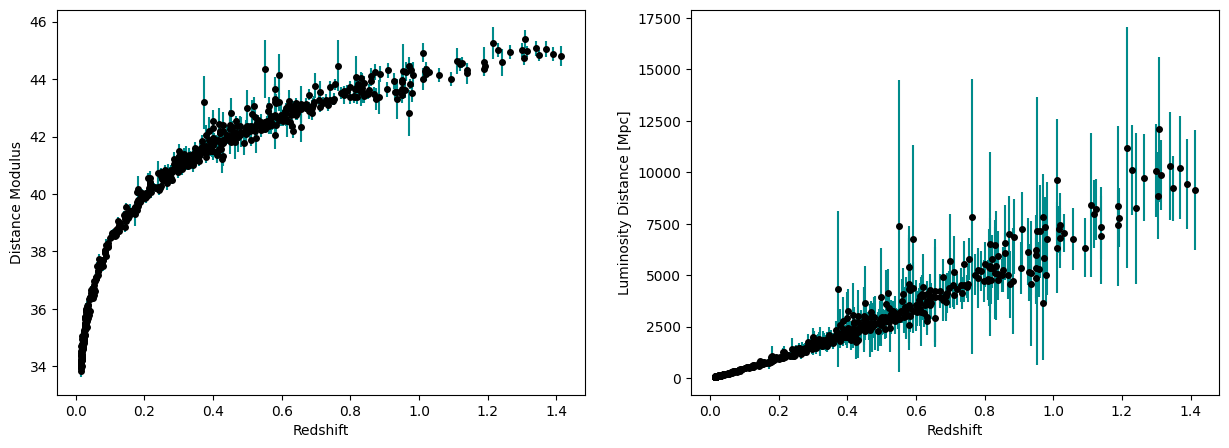

In [27]:
plt.subplots(1, 2, figsize=(15, 5))

# Plot distance modulus versus redshift (original data)
plt.subplot(1, 2, 1)
plt.xlabel("Redshift")
plt.ylabel("Distance Modulus")
plt.errorbar(zs, dist_mod, yerr=err_dist_mod, fmt='o', color='black', ecolor='darkcyan', markersize=4)

# Plot luminosity distance versus redshift
plt.subplot(1, 2, 2)
plt.xlabel("Redshift")
plt.ylabel("Luminosity Distance [Mpc]")
plt.errorbar(zs, dMpc, yerr=dMe, fmt='o', color='black', ecolor='darkcyan', markersize=4)
plt.show()

In [28]:
#Collecting all of the above in a dataframe and visualizing its characteristics:
import pandas as pd
SNIa_df = pd.DataFrame({"Redshift":zs,
                   "Distance Modulus":dist_mod,
                   "Distance Modulus Error":err_dist_mod,
                   "Luminosity Distance [pc]":dpc,
                   "Luminosity Distance [Mpc]":dMpc ,
                   "Error Luminosity Distance [Mpc]":dMe})

print(SNIa_df) #prints the dataframe
print(SNIa_df.describe()) #prints some key statistics of the dataframe

     Redshift  Distance Modulus  Distance Modulus Error  \
0    0.028488         35.346583                0.223906   
1    0.050043         36.682368                0.166829   
2    0.052926         36.817691                0.155756   
3    0.070086         37.446737                0.158467   
4    0.062668         37.483409                0.156099   
..        ...               ...                     ...   
575  1.017000         44.293971                0.171046   
576  1.315000         44.971358                0.187509   
577  0.821000         43.640939                0.194014   
578  1.215000         45.246521                0.560317   
579  0.623000         42.514524                0.241428   

     Luminosity Distance [pc]  Luminosity Distance [Mpc]  \
0                1.173050e+08                 117.305042   
1                2.170069e+08                 217.006920   
2                2.309608e+08                 230.960787   
3                3.085655e+08                 308.5

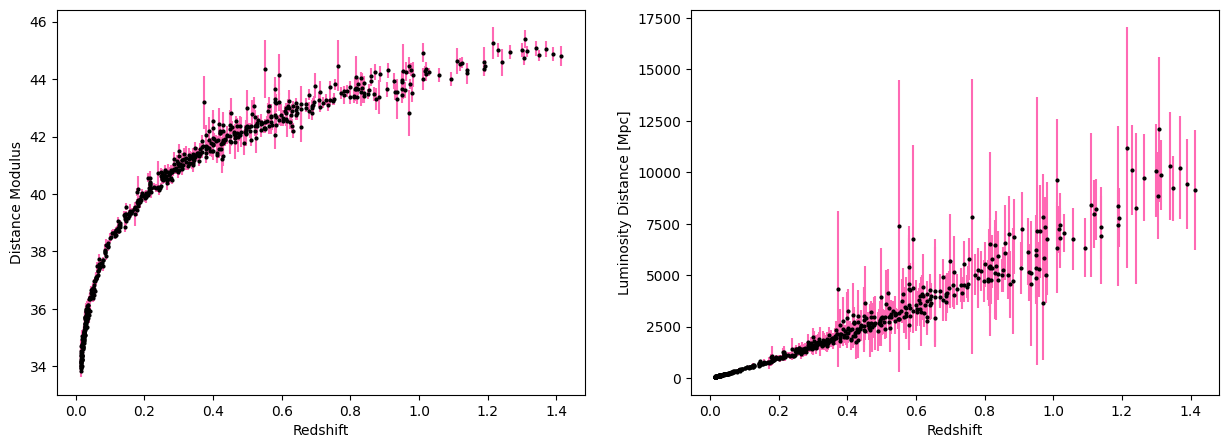

In [29]:
import matplotlib.pyplot as plt

plt.subplots(1, 2, figsize=(15, 5)) #plots multiple plots next to each

# Plot distance modulus versus redshift (original data)
plt.subplot(1, 2, 1)
plt.xlabel("Redshift")
plt.ylabel("Distance Modulus")
plt.errorbar(zs, dist_mod, yerr=err_dist_mod, fmt='.', color='black', ecolor='hotpink', markersize=4)

# Plot luminosity distance versus redshift
plt.subplot(1, 2, 2)
plt.xlabel("Redshift")
plt.ylabel("Luminosity Distance [Mpc]")
plt.errorbar(zs, dMpc, yerr=dMe, fmt='.', color='black', ecolor='hotpink', markersize=4)
plt.show()

## <span style='color:deepskyblue'>Bayes' Theorem: Likelihood, Prior, Posterior (and Evidence...)</span>

The **conditional probability of A given that B is true** is denoted with $P(A|B)$ (read: *probability of A given B*). 
Did A happen? Then B has probability $P(B|A)$ of happening.

[**Bayes' Theorem**](https://en.wikipedia.org/wiki/Bayes%27_theorem) is simply a reflection of the symmetry of the concept of joint probability:

$$
P(A|B)P(B) = P(B|A)P(A)
$$

In physics, our goal is often to determine how likely the values of some parameters $\theta$ are, given how well they reproduce the data $D$. 
We write Bayes' theorem in the following equivalent form:

$$
P(\theta | D) = \frac{P(D|\theta)P(\theta)}{P(D)}
$$

The various terms conventionally take the names:

$$
\begin{aligned}
P(\theta | D) & && \text{Posterior}
\\
P(D | \theta)& && \text{Likelihood}
\\
P(\theta) & && \text{Prior}
\\
P(D) & && \text{Evidence}
\end{aligned}
$$

### <span style='color:deepskyblue'>Prior</span>

The *prior* quantifies our degree of prior belief in the model parameters. It can contain the results of previous experiments, or theoretical considerations (for instance, that certain parameters cannot be negative, etc.). 

We can have *strong priors* about something - the Sun still existing at night, see the comic below - or not.
When we do *not* have compelling prior knowledge about a parameter, we generally use a *non-informative* prior probability distribution, most often related to the [uniform distribution](https://en.wikipedia.org/wiki/Continuous_uniform_distribution)

$$
\begin{aligned}
    \text{Uniform} & && \theta \in \text{Uniform}[\theta_{\rm min}, \theta_{\rm max}]
    \\
    \text{Log Uniform} & && \log\theta \in \text{Uniform}[\log\theta_{\rm min}, \log\theta_{\rm max}]
\end{aligned}
$$

You may sometimes hear that "the prior doesn't matter". While this is not strictly true, it is however true that in many instances the *likelihood* depends more dramatically on the parameters and will have a dominating contribution to the posterior. You are more than welcome to try different priors for the model parameters and see if and how your results change.

### <span style='color:deepskyblue'>Likelihood</span>

The measure of how well our model reproduces the data is the **likelihood** $\mathcal L$. For normal (=Gaussian), uncorrelated data $\mu_i$ with errors $\sigma_i$ ($i = \{1,580\}$), the likelihood is related to the famous [**chi-squared**](https://en.wikipedia.org/wiki/Chi-square_distribution) via

$$
P(D | \theta) \equiv \mathcal L = \exp\left(-\frac{\chi^2}{2}\right)
\qquad
\qquad
\boxed{
\chi^2 \equiv \sum_{i=1}^{580} \frac{\left(\mu_i^{(\rm theor)} - \mu_i^{(\rm obs)}\right)^2}{\sigma_i^2}
}
$$

A *high likelihood* corresponds to a *low chi squared*.

In principle, we could attack the problem brute-force: create a grid of values for $h$, $\Omega_m$, $\Omega_\Lambda$, calculate the likelihood for each combination, and create a profile for the likelihood. 

In practical cases, however, this is not only sub-optimal but sometimes **impossible**. Think of complicated models with 20+ free parameters (this is not that unusual in physics, by the way). Even a very coarse grained grid of 100 values for each parameter would result in more than$10^{40}$ (!!!) different parameter combination to be tested. You can probably understand why this is undesirable.

### <span style='color:deepskyblue'>Evidence</span>

This is the tricky bit. The evidence, which is "*the probability of observing certain data*", is not something that is easy to evaluate or interpret. This looks like a serious limitation to finding the:


### <span style='color:deepskyblue'>Posterior</span>

What does the data tell us about the model parameters? The answer is the *posterior probability distribution*, often (but not necessarily) expressed as (average $\pm$ standard deviation)

$$
\theta_i = \bar\theta_i \pm \sigma_i
$$

In other words, the posterior tells us how likely it is for the model parameters to have certain values, *given that we observe the data* $D$.

*This is the final goal of our analysis!*

<br>

![title](http://1.bp.blogspot.com/-tTx4HDejSww/ULcTeK9_V_I/AAAAAAAAA8g/PCYOH-eXGbk/s1600/frequentists_vs_bayesians.png)
![title](https://i.redd.it/5r0hwixt0m931.jpg)

## <span style='color:deepskyblue'>Markov-Chain Monte Carlo</span>

Markov-Chain Monte Carlo techniques are a class of methods to sample a probability distribution $P(x)$ - in our case $P(\theta | D)$ - provided that we can calculate a density $\mathcal F(x)$ **that is proportional to it** - in our case $P(\theta)P(D|\theta)$ = likelihood $\times$ prior. Among these, a very popular one is the [**Metropolis-Hastings**](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm) algorithm, which is what we will use.

Schematically, the algorithm works as follows:
* Start with an $n$-tuple of parameters $\theta_{\rm old} = \{\theta_1, \theta_2, \dots\}_{\rm old}$ (in our case $\theta = \{h,\Omega_m,\Omega_\Lambda\}$) and calculate the $\mathcal F_{\rm old}$
* Propose a new set of parameters $\theta_{\rm prop}$, calculate the new corresponding $\mathcal F_{\rm prop}$. How you propose the new parameters is not essential as long as the probability of going from one set of parameters to the next is the same as the inverse: $P(\theta_a \to \theta_b) = P(\theta_b \to \theta_a)$. For this, we normally take Gaussian displacements with some (relatively small) standard deviation.
* Compare the new and old likelihoods-priors:
    * If $\mathcal F_{\rm prop} > \mathcal F_{\rm old}$, accept the step: $\theta_{\rm new} = \theta_{\rm prop}$
    * Otherwise, accept with probability $P_{\rm accept} = \mathcal F_{\rm prop}/\mathcal F_{\rm old}$
* If accepted, $\theta_{\rm new} = \theta_{\rm prop}$ and record the step; otherwise, $\theta_{\rm new} = \theta_{\rm old}$ (no re-recording)
* Update $\theta_{\rm old} = \theta_{\rm new}$
* Repeat

The MC chain keeps going until the desired number of steps or, ideally, when a suitable convergence test, like for example the [Gelman-Rubin test](https://bookdown.org/rdpeng/advstatcomp/monitoring-convergence.html), is satisfied. 
Today we will just set a limit to the total number of steps, but please feel free to implement and test your favourite convergence test!

Looking at equation (4), you can convince yourself that
$$
\frac{\mathcal L_a}{\mathcal L_b} = \exp\left(\frac{\chi_b^2 - \chi_a^2}{2}\right)
$$

(This is useful because $\chi^2$ can be large, so we want to avoid the likelihoods evaluating to `0.` -- computers don't like dividing by zero, unfortunately)
 
* Start with an $n$-tuple of parameters $\theta_{\rm old} = \{\theta_1, \theta_2, \dots\}_{\rm old}$ (in our case $\theta = \{h,\Omega_m,\Omega_\Lambda\}$) and the corresponding chi squared $\chi_{\rm old}^2$ (to be clear, for us this implies calculating a series of 580 integrals and comparing each with the observed values)
* Propose new parameters $\theta_{\rm prop}$ and calculate the corresponding chi squared $\chi_{\rm prop}^2$
* Draw a random number $r \in [0,1]$
* Accept the step if 
$$
r < \exp\left(\frac{\chi_{\rm old}^2 - \chi_{\rm prop}^2}{2}\right) \frac{P(\theta)_{\rm prop}}{P(\theta)_{\rm old}}
$$
    * If accepted, update $\theta_{\rm old} = \theta_{\rm prop}$, and record; otherwise, $\theta_{\rm new} = \theta_{\rm old}$ (no re-recording)
* Repeat

In [ ]:
n = 10000
def mu(dL):
    return 5*np.log10(dL/10)
mu_val = [] #an empty list
dL_val = [] #an empty list 

z_val = np.arange(0, 2, 0.1) #returns evenly spaced values in interval (0,2)
Hubble_val = [] #makes an empty list
for z in z_val:
    Hubble_val += [Hubble(H_0, Omega_Lambda, Omega_m, Omega_k, z)] # change int names and stuff like hubble_val
for z in z_val: 
    dL_val += [dL(z)]
for distance in dL_val:
    mu_val += [mu(distance)]
h = 0.7


    
def chi_squared(Omega_b, Omega_Lambda, Omega_cmd, SNIa_df, H_0):
    #chi_squared = 0
    mu_red = np.array([mu(dL(z)) for z in SNIa_df["Redshift"]])
    chi = np.sum(((SNIa_df["Distance Modulus"] - mu_red)/SNIa_df["Distance Modulus Error"])**2)
    return chi
    #for i in range(n):
     #   z = zs[i]
      #  dMpc_model = dL(z)
       # dMe_model = 0
        #chi_squared += ((dMpc_model - dMpc[i]) / dMe[i])**2
    #return
def parameter(Omega_b, Omega_Lambda, Omega_cmd, H_0):
    return ( 50 < H_0 <  100 and 
            0 < Omega_cmd < 1 and
            0.02 < Omega_b < 0.07 and
            0 < Omega_Lambda < 1 )
    
Omega_b_old = 0.05
Omega_Lambda_old = 0.73
Omega_cmd_old = 0.2
H_0_old = 70
chi_old = chi_squared(Omega_b_old, Omega_Lambda_old, Omega_cmd_old, SNIa_df, H_0_old)
acceptance_for_parameter = [] #accepted parameters
good_chi = chi_old
good_param = [Omega_b_old, Omega_Lambda_old, Omega_cmd_old, H_0_old] #best parameters
for i in range(n):
    Omega_b_new = np.random.uniform(0.02, 0.07)
    Omega_Lambda_new = np.random.uniform(0, 1)
    Omega_cmd_new = np.random.uniform(0, 1)
    H_0_new = np.random.uniform(50, 100)
    if parameter(Omega_b_new, Omega_Lambda_new, Omega_cmd_new, H_0_new):
        chi_new = chi_squared(Omega_b_new, Omega_Lambda_new, Omega_cmd_new, SNIa_df, H_0_new)
        if chi_new < good_chi:
            good_chi = chi_new
            good_param = [Omega_b_new, Omega_Lambda_new, Omega_cmd_new, H_0_new]
            acceptance_for_parameter.append(good_param)
        else:
            acceptance_for_parameter.append(good_param)
    else:
        acceptance_for_parameter.append(good_param)
        
#can print out but its a lot of output so it clogs my computer
        

Removed no burn in


RuntimeError: Failed to process string with tex because latex could not be found

Error in callback <function _draw_all_if_interactive at 0x00000241A9B70E00> (for post_execute), with arguments args (),kwargs {}:


RuntimeError: Failed to process string with tex because latex could not be found

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 900x900 with 6 Axes>

In [31]:
import numpy as np
import pandas as pd

# Assume SNIa_df is loaded with columns 'Redshift', 'Distance Modulus', 'Distance Modulus Error'
data = {
    'Redshift': np.random.uniform(0.01, 1.0, size=100),  # Random redshifts between 0.01 and 1.0
    'Distance Modulus': np.random.normal(25, 1, size=100),  # Mock distance modulus with some noise
    'Distance Modulus Error': np.random.uniform(0.1, 0.5, size=100)  # Random errors
}

# Creating DataFrame
SNIa_df = pd.DataFrame(data)
# Placeholder function for luminosity distance
def dL(z, Hubble, omega_b, omega_CDM, omega_lambda):
    # Insert your cosmological model computation here
    return 10 ** z  # placeholder computation

# Placeholder function for distance modulus
def mu(dL):
    return 5 * np.log10(dL) + 25  # placeholder formula

# Function to calculate the chi-squared statistic
def chi_squared(h, omega_b, omega_CDM, omega_lambda, SNIa_df):
    mu_pred = np.array([mu(dL(z, h, omega_b, omega_CDM, omega_lambda)) for z in SNIa_df["Redshift"]])
    chi2 = np.sum(((SNIa_df["Distance Modulus"] - mu_pred) / SNIa_df["Distance Modulus Error"]) ** 2)
    return chi2

# Validity check for parameters
def valid_parameters(omega_b, omega_CDM, omega_lambda, h):
    return (0.04 < omega_b < 0.06 and 0 < omega_CDM < 1 and 0 < omega_lambda < 1 and 0.5 < h < 1.0)

# Initialize parameters for multiple MCMC chains
n_chains = 4
n_steps = 5000
params_init = {
    "omega_b": [0.06, 0.055, 0.05, 0.045],
    "omega_CDM": [0.25, 0.3, 0.2, 0.35],
    "omega_lambda": [0.7, 0.65, 0.75, 0.7],
    "h": [0.7, 0.72, 0.68, 0.71]
}

# Run multiple MCMC chains
chains = []
for i in range(n_chains):
    chain = []
    omega_b_old, omega_CDM_old, omega_lambda_old, h_old = params_init["omega_b"][i], params_init["omega_CDM"][i], params_init["omega_lambda"][i], params_init["h"][i]
    chi2_old = chi_squared(h_old, omega_b_old, omega_CDM_old, omega_lambda_old, SNIa_df)
    
    for j in range(n_steps):
        omega_b_prop = omega_b_old + np.random.normal(0, 0.01)
        omega_CDM_prop = omega_CDM_old + np.random.normal(0, 0.01)
        omega_lambda_prop = omega_lambda_old + np.random.normal(0, 0.01)
        h_prop = h_old + np.random.normal(0, 0.01)

        if valid_parameters(omega_b_prop, omega_CDM_prop, omega_lambda_prop, h_prop):
            chi2_prop = chi_squared(h_prop, omega_b_prop, omega_CDM_prop, omega_lambda_prop, SNIa_df)
            r = np.random.rand()
            accept_cond = np.exp((chi2_old - chi2_prop) / 2)
            
            if r < accept_cond:
                omega_b_old, omega_CDM_old, omega_lambda_old, h_old = omega_b_prop, omega_CDM_prop, omega_lambda_prop, h_prop
                chi2_old = chi2_prop
                chain.append([omega_b_old, omega_CDM_old, omega_lambda_old, h_old])
    
    chains.append(chain)

# Gelman-Rubin Diagnostic
def gelman_rubin(chains):
    n = len(chains[0])  # Number of samples per chain
    m = len(chains)  # Number of chains

    # Calculate the mean of each chain
    means = np.array([np.mean(chain, axis=0) for chain in chains])
    
    # Overall mean
    mean_overall = np.mean(means, axis=0)
    
    # Between-chain variance
    B = n * np.sum((means - mean_overall)**2, axis=0) / (m - 1)
    
    # Within-chain variance
    W = np.mean([np.var(chain, axis=0, ddof=1) for chain in chains], axis=0)
    
    # Variance estimate
    var_plus = (n - 1) / n * W + B / n
    
    # Potential scale reduction factor (PSRF)
    R = np.sqrt(var_plus / W)
    return R

# Calculate R-hat for each parameter
R = gelman_rubin(chains)
print("Gelman-Rubin Diagnostic R-hat values:", R)

# Determine if the chains have converged
converged = all(r < 1.1 for r in R)
print("Convergence:", converged)


Gelman-Rubin Diagnostic R-hat values: [1.00031343 2.12600908 1.88474091 1.40358942]
Convergence: False


After completion of the programme, your MC chain will (*hopefully*) look something like this:

`#Omega_m  Omega_L  h   
 0.297     0.703    69.8
 0.285     0.715    70.1
 0.288     0.712    69.9
 ...
`

In [32]:
#omega_b_old = 0.05


After completion of the programme, your MC chain will (*hopefully*) look something like this:

`#Omega_m  Omega_L  h   
 0.297     0.703    69.8
 0.285     0.715    70.1
 0.288     0.712    69.9
 ...
`

## <span style='color:deepskyblue'>Plotting: GetDist</span>

We will do the plots with [`GetDist`](https://getdist.readthedocs.io/en/latest/plot_gallery.html).

The plot gallery contains a lot of useful examples, you should be able to read them fairly easily and see which applies to your situation. Look for both (triangle) plots and for parameter estimation.

Note that many `GetDist` functions require arguments of type `MCSamples`; make sure you convert your lists accordingly.

In [35]:
#%pip install getdist

import numpy as np
from getdist import MCSamples, plots
import matplotlib.pyplot as plt

# Ensure acceptance_for_parameter is defined
if 'acceptance_for_parameter' not in globals():
    acceptance_for_parameter = []

# Convert acceptance_for_parameter to numpy array
samples = np.array(acceptance_for_parameter)

# Calculate Omega_m and Omega_k
Omega_m_list = samples[:, 1] + samples[:, 2]
Omega_k_list = 1 - (Omega_m_list + samples[:, 2])

# Prepare samples for MCSamples
samples = np.transpose(np.array([samples[:, 3], Omega_m_list, samples[:, 2], Omega_k_list]))

# Define labels and names
labels = [r'$H_0$', r'$\Omega_m$', r'$\Omega_\Lambda$', r'$\Omega_k$']
names = ['H0', 'omegam', 'omegal', 'omegak']
dim = len(names)

# Create MCSamples object
mc_samples = MCSamples(samples=samples, names=names, labels=labels)

# Define confidence interval
confidence_interval = 0.6822

# Print confidence intervals for each parameter
for name in names:
    lower_bound = round(mc_samples.confidence(name, (1. - confidence_interval) / 2., upper=False), 4)
    upper_bound = round(mc_samples.confidence(name, (1. - confidence_interval) / 2., upper=True), 4)
    print(f"{lower_bound} < {name} < {upper_bound} at {int(100 * confidence_interval)}% CL")

# Plot parameter distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot H0
axes[0, 0].hist(samples[:, 0], bins=30, color='teal', alpha=0.7)
axes[0, 0].set_title('H0')
axes[0, 0].set_xlabel('H0')
axes[0, 0].set_ylabel('Frequency')

# Plot Omega_m
axes[0, 1].hist(samples[:, 1], bins=30, color='teal', alpha=0.7)
axes[0, 1].set_title('Omega_m')
axes[0, 1].set_xlabel('Omega_m')
axes[0, 1].set_ylabel('Frequency')

# Plot Omega_lambda
axes[1, 0].hist(samples[:, 2], bins=30, color='teal', alpha=0.7)
axes[1, 0].set_title('Omega_lambda')
axes[1, 0].set_xlabel('Omega_lambda')
axes[1, 0].set_ylabel('Frequency')

# Plot Omega_k
axes[1, 1].hist(samples[:, 3], bins=30, color='teal', alpha=0.7)
axes[1, 1].set_title('Omega_k')
axes[1, 1].set_xlabel('Omega_k')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot using GetDist
j = plots.getSubplotPlotter(subplot_size=2)
j.settings.axes_labelsize = 20
j.settings.axes_fontsize = 14
j.settings.solid_colors = ['teal']
j.triangle_plot(mc_samples, filled=True, title_limit=1)
plt.show()

Removed no burn in


ParamError: Unknown parameter H0

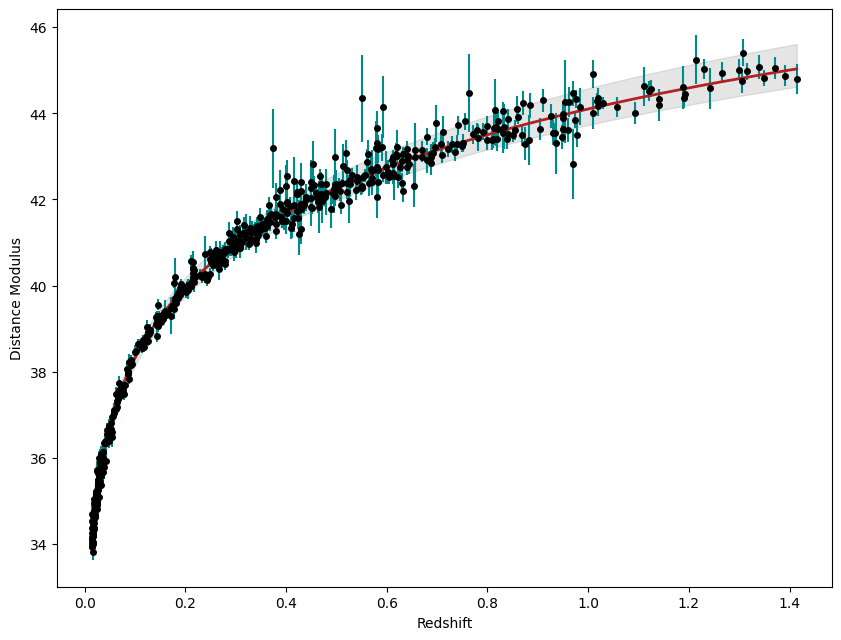

In [ ]:
# example of theoretical curves
SPEED_OF_LIGHT = 299792.458 # in km/s

# Still need to add Omega_k!
def theor_luminosity_distance(z, h, OmegaM, OmegaL):
    return 10.**6 * SPEED_OF_LIGHT / h * (1.+z) * \
    integrate.quad(lambda x: 1. / np.sqrt(OmegaM * (1.+x)**3 + OmegaL), 0., z)[0]

def theor_distance_modulus(z, h, OmegaM, OmegaL):
    return 5. * (-1. + np.log10(theor_luminosity_distance(z, h, OmegaM, OmegaL)))
                 
zsort = sorted(zs)
d_best_fit, d_min, d_max = [], [], []

# YOUR RESULTS GO HERE!
for z in zsort:
    d_best_fit.append(theor_distance_modulus(z, 70., 0.3, 0.7))
    d_min.append(theor_distance_modulus(z, 75., 0.5, 0.5))
    d_max.append(theor_distance_modulus(z, 65., 0.1, 0.9))
    
plt.subplots(figsize=(10, 7.5))
plt.xlabel("Redshift")
plt.ylabel("Distance Modulus")

plt.errorbar(zs, dist_mod, yerr=err_dist_mod,\
             fmt='o', color='black', ecolor='darkcyan', markersize=4)
plt.plot(zsort, d_best_fit, color='firebrick',linewidth=2.)
plt.fill_between(zsort, d_min, d_max, color='grey', alpha=.2)
plt.show()